In [29]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out


egitim_data = pd.read_csv('cure_the_princess_train.csv')
test_data = pd.read_csv('cure_the_princess_test.csv')
val_data = pd.read_csv('cure_the_princess_validation.csv')

train_inputs = np.array(egitim_data.iloc[:, :-1])
train_targets = np.array(egitim_data.iloc[:, -1])
egitim_dataset = TensorDataset(torch.Tensor(train_inputs), torch.Tensor(train_targets))

test_inputs = np.array(test_data.iloc[:, :-1])
test_targets = np.array(test_data.iloc[:, -1])
test_dataset = TensorDataset(torch.Tensor(test_inputs), torch.Tensor(test_targets))

val_inputs = np.array(val_data.iloc[:, :-1])
val_targets = np.array(val_data.iloc[:, -1])
val_dataset = TensorDataset(torch.Tensor(val_inputs), torch.Tensor(val_targets))

batch_size = 16
egitim_dataloader = DataLoader(egitim_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


input_dim = 13
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = 1
learning_rate = 0.01
model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(egitim_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print('Epoch [{}/{}], Adım [{}/{}], Kayıp: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(egitim_dataloader), loss.item()))





Epoch [1/10], Adım [10/79], Kayıp: 0.6980
Epoch [1/10], Adım [20/79], Kayıp: 0.6825
Epoch [1/10], Adım [30/79], Kayıp: 0.6549
Epoch [1/10], Adım [40/79], Kayıp: 0.6374
Epoch [1/10], Adım [50/79], Kayıp: 0.6182
Epoch [1/10], Adım [60/79], Kayıp: 0.4804
Epoch [1/10], Adım [70/79], Kayıp: 0.3055
Epoch [2/10], Adım [10/79], Kayıp: 0.3563
Epoch [2/10], Adım [20/79], Kayıp: 0.2334
Epoch [2/10], Adım [30/79], Kayıp: 0.1451
Epoch [2/10], Adım [40/79], Kayıp: 0.4987
Epoch [2/10], Adım [50/79], Kayıp: 0.5827
Epoch [2/10], Adım [60/79], Kayıp: 0.1103
Epoch [2/10], Adım [70/79], Kayıp: 0.6158
Epoch [3/10], Adım [10/79], Kayıp: 0.1317
Epoch [3/10], Adım [20/79], Kayıp: 0.1202
Epoch [3/10], Adım [30/79], Kayıp: 0.2031
Epoch [3/10], Adım [40/79], Kayıp: 0.1813
Epoch [3/10], Adım [50/79], Kayıp: 0.2895
Epoch [3/10], Adım [60/79], Kayıp: 0.2365
Epoch [3/10], Adım [70/79], Kayıp: 0.0713
Epoch [4/10], Adım [10/79], Kayıp: 0.0629
Epoch [4/10], Adım [20/79], Kayıp: 0.2400
Epoch [4/10], Adım [30/79], Kayıp:

Epoch [1/10], Egitim Loss: 0.0630, Valudation Loss: 0.2300
Epoch [2/10], Egitim Loss: 0.0792, Valudation Loss: 0.2127
Epoch [3/10], Egitim Loss: 0.1300, Valudation Loss: 0.1721
Epoch [4/10], Egitim Loss: 0.1076, Valudation Loss: 0.1802
Epoch [5/10], Egitim Loss: 0.0797, Valudation Loss: 0.2277
Epoch [6/10], Egitim Loss: 0.0908, Valudation Loss: 0.1590
Epoch [7/10], Egitim Loss: 0.0608, Valudation Loss: 0.1544
Epoch [8/10], Egitim Loss: 0.0764, Valudation Loss: 0.1751
Epoch [9/10], Egitim Loss: 0.0820, Valudation Loss: 0.1800
Epoch [10/10], Egitim Loss: 0.0877, Valudation Loss: 0.1931


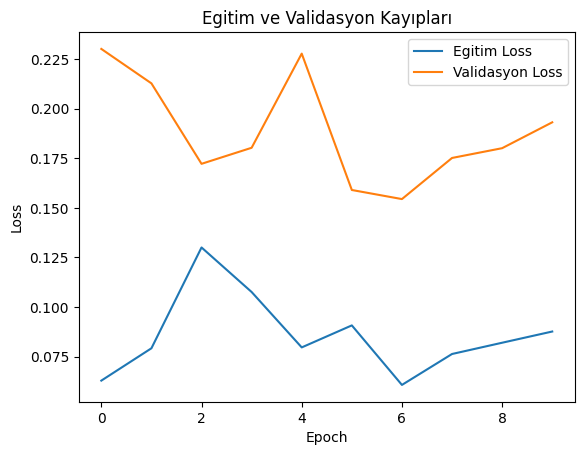

In [33]:
torch.manual_seed(140401067)
train_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    
    model.train()
    for i, (inputs, targets) in enumerate(egitim_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
 
    model.eval()
    for i, (inputs, targets) in enumerate(val_dataloader):
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    
    train_loss_list.append(train_loss/len(egitim_dataloader))
    val_loss_list.append(val_loss/len(val_dataloader))
    
     
    print('Epoch [{}/{}], Egitim Loss: {:.4f}, Valudation Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss_list[-1], val_loss_list[-1]))
    
import matplotlib.pyplot as plt

plt.plot(train_loss_list, label='Egitim Loss')
plt.plot(val_loss_list, label='Validasyon Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Egitim ve Validasyon Kayıpları')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

best_model = None
best_val_loss = float('inf')
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(egitim_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()


        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_dataloader:
                outputs = model(inputs)
                val_loss += criterion(outputs, targets.unsqueeze(1)).item()
        val_loss /= len(val_dataloader)


        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)
            best_model.load_state_dict(model.state_dict())


    if epoch > 0 and val_loss > prev_val_loss:
        break
    prev_val_loss = val_loss


test_loss = 0
test_preds = []
test_targets = []
with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = best_model(inputs)
        test_loss += criterion(outputs, targets.unsqueeze(1)).item()
        preds = (outputs > 0.5).float()
        test_preds.extend(preds.squeeze().tolist())
        test_targets.extend(targets.tolist())
test_loss /= len(test_dataloader)


accuracy = accuracy_score(test_targets, test_preds)
f1 = f1_score(test_targets, test_preds)
precision = precision_score(test_targets, test_preds)
recall = recall_score(test_targets, test_preds)
success_rate = (accuracy + f1 + precision + recall) / 4 * 100

print('Test kaybı: {:.4f}'.format(test_loss))
print('Doğruluk: {:.4f}'.format(accuracy))
print('F1 puanı: {:.4f}'.format(f1))
print('Hassasiyet: {:.4f}'.format(precision))
print('Geri çağırma: {:.4f}'.format(recall))
print('Başarı Yüzdesi: {:.4f}'.format(success_rate))

Test kaybı: 0.3132
Doğruluk: 0.9456
F1 puanı: 0.9462
Hassasiyet: 0.9413
Geri çağırma: 0.9510
Başarı Yüzdesi: 94.6027
